In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 
sns.set()
df = pd.read_csv("palmer_penguins.csv")
df = df.dropna()

X = df[["bill_length_mm", "bill_depth_mm"]].to_numpy()

In [54]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

labels = model.predict(X)
labels

df["predicted_label"] = labels
df
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0,

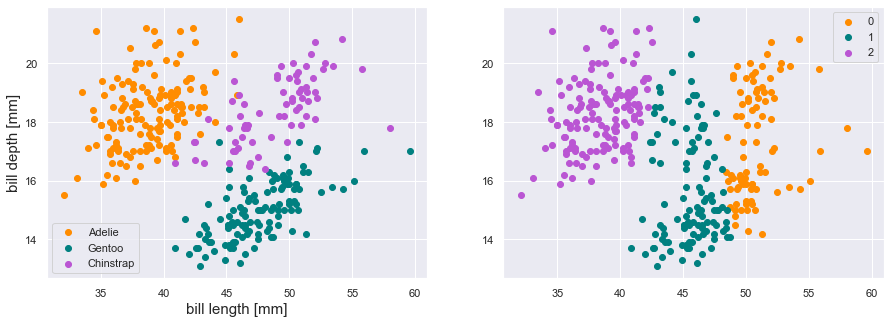

In [50]:
penguins = ["Adelie", "Gentoo", "Chinstrap"]
colors = ["darkorange", "teal", "mediumorchid"]
label = [0,1,2]

#fig, ax = plt.subplots(figsize = (10, 8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
for species,labelss, color in zip(penguins, label,colors):
    temp_df = df[df.species == species]
    pred_df = df[df.predicted_label == labelss]
    ax1.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    ax2.scatter(pred_df.bill_length_mm,
               pred_df.bill_depth_mm,
               c = color,
               label = labelss, 
               )
    
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("bill depth [mm]", fontsize = 15)
ax1.legend()
ax2.legend()
plt.show()

In [56]:
matrix = pd.DataFrame({'labels': labels, 'species': y})
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0            11         27      74
1           135          1       0
2             0         40      45


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pipeline = make_pipeline (scaler, model)

pipeline.fit(X)
labels_new = pipeline.predict(X)

matrix_new = pd.DataFrame({'labels': labels_new, 'species': y})
ct_new = pd.crosstab(matrix_new['labels'], matrix_new['species'])
print(ct_new)



species  Adelie  Chinstrap  Gentoo
labels                            
0           142          5       1
1             0          9     112
2             4         54       6


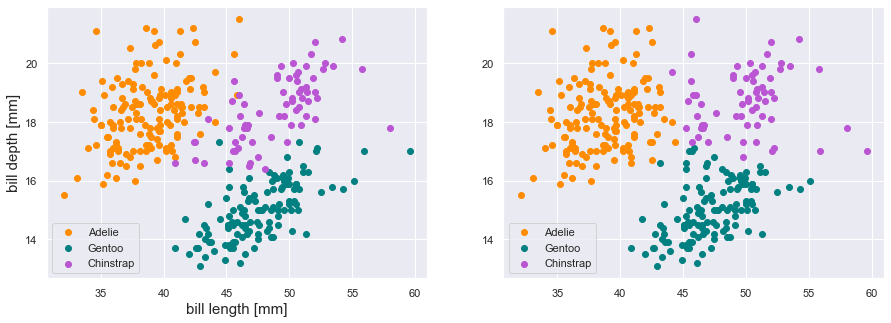

In [62]:
df["new_predicted_label"] = labels_new

penguins = ["Adelie", "Gentoo", "Chinstrap"]
colors = ["darkorange", "teal", "mediumorchid"]
label = [0,1,2]

#fig, ax = plt.subplots(figsize = (10, 8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
for species,labelss, color in zip(penguins, label,colors):
    temp_df = df[df.species == species]
    pred_df = df[df.new_predicted_label == labelss]
    ax1.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    ax2.scatter(pred_df.bill_length_mm,
               pred_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("bill depth [mm]", fontsize = 15)
ax1.legend()
ax2.legend()
plt.show()